## Install Packages

In [ ]:
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install tensorflow
!pip install keras

## Load Packages

In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from tensorflow.python.keras import models, layers, losses, optimizers, utils
from tensorflow.python.keras import backend as K

from pi_net import *

## Load Images and Ground-truth Persistence Images

In [3]:
temp = sio.loadmat('Sample_Images_PI.mat')
imgs = temp['imgs']
PIs = temp['PIs']

## Load Model and Weights

In [4]:
model = PINet_CIFAR10()
model.load_weights('PI-Net_CIFAR10.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 256)       1024      
__________

## Generate PIs using PI-Net model

In [5]:
PIs_generated = model.predict(imgs)

## Visualization

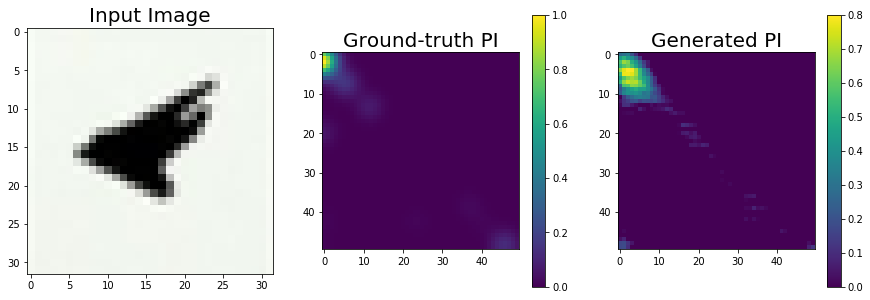

In [6]:
i = 0 # image index
j = 0 # channel index

fig = plt.figure(figsize = (15,5))#,frameon=False)
fig.add_subplot(131)
plt.imshow(imgs[i])
plt.title('Input Image',fontdict={'fontsize':20})

fig.add_subplot(132)
plt.imshow(PIs[i].reshape((3,50,50))[j])
plt.colorbar()
plt.clim(0,1)
plt.title('Ground-truth PI',fontdict={'fontsize':20})

fig.add_subplot(133)
plt.imshow(PIs_generated[i].reshape((3,50,50))[j])
plt.colorbar()
plt.clim(0,0.8)
plt.title('Generated PI',fontdict={'fontsize':20})
plt.show()